In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
class custom_function:
    def __init__(self, function, prime, prime2, inverse):
        assert function(0)==0, "Function must be zero at zero"
        assert function(1)==1, "Function must be one at one"
        assert prime(0)>=0, "Prime must be positive at zero"
        assert prime(1)>=0, "Prime must be positive at one"
        assert inverse(0)==0, "Inverse must be zero at zero"
        assert inverse(1)==1, "Inverse must be one at one"
        for i in np.linspace(0,1,100):
            assert (function(inverse(i))-i)**2<0.001, "The inverse is not correct"
        self.function = function
        self.prime = prime
        self.prime2 = prime2
        self.inverse = inverse

In [69]:
N_divisions = 20
d=1/N_divisions
# 3 gaussian points to iterate over [0,1] 
gauss_points = np.array([0.11270167, 0.5, 0.88729833])
gauss_weights = np.array([5/9, 8/9, 5/9])*0.5
phi_derivatives1 = 1/d
phi_derivatives2 = -1/d


K=np.zeros((N_divisions+1,N_divisions+1))
f=np.zeros(N_divisions+1)
K_temp = np.zeros((2,2))
for i in range(N_divisions):
    for j in range(3):
        t=(i+gauss_points[j])*d
        phi1=gauss_points[j]
        phi2=1-gauss_points[j]
        K_temp[0,0] = - phi_derivatives2*( phi2*2 + 4*t*phi_derivatives2 )
        K_temp[0,1] = - phi_derivatives1*( phi2*2 + 4*t*phi_derivatives2 )
        K_temp[1,0] = - phi_derivatives2*( phi1*2 + 4*t*phi_derivatives1 )
        K_temp[1,1] = - phi_derivatives1*( phi1*2 + 4*t*phi_derivatives1 )
        K[i:i+2,i:i+2] += gauss_weights[j]*K_temp
        f[i:i+2] += gauss_weights[j]*np.array([phi2,phi1])
    t1=i*d
    t2=(i+1)*d
    K_temp[0,0] = -4*t1*phi_derivatives2
    K_temp[0,1] = -4*t1*phi_derivatives1
    K_temp[1,0] = 4*t2*phi_derivatives2
    K_temp[1,1] = 4*t2*phi_derivatives1
    K[i:i+2,i:i+2] += K_temp #Sum it or not, the results won't change
#K,f

A=K[1:N_divisions,1:N_divisions]
b=f[1:N_divisions]
b-=K[1:N_divisions,0]*0.0
b-=K[1:N_divisions,N_divisions]*0.5
#A,b

In [70]:
x=np.linalg.solve(A,b)
x=np.array([0]+x.tolist()+[0.5])
x_analytical=np.array([(np.sqrt(x)**2)/2 for x in np.linspace(0,1,N_divisions+1)])
RMSE=np.sqrt(((x-x_analytical)**2).sum()/(N_divisions+1))
x,x_analytical,RMSE

(array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  ]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  ]),
 2.1007589629660837e-16)

The code below solves 

$$\int v \, dt = \int v \left( \frac{d}{dx} \left( \frac{dt}{dx} \cdot \frac{df}{dt} \right) \right) dt \\
 = \int v \cdot \left( \frac{d}{dx} \left( \alpha'(x) \cdot f'(t) \right) \right) dt \\
 = \int v \cdot \alpha'(x) \cdot \left( \frac{d}{dt} \left( \alpha'(x) \cdot f'(t) \right) \right) dt \\
 = - \int \left( \frac{d}{dt}\left( v \cdot \alpha'(x) \right) \right) \cdot  \left( \alpha'(x) \cdot f'(t) \right)  dt \\
 = - \int \left(v'(t) \cdot \alpha'(x) + v \cdot \frac{1}{ \alpha'(x)} \cdot \alpha''(x) \right) \cdot \alpha'(x) \cdot f'(t) dt ,$$
 
the weak form of
$ 1 =  \frac{d^2}{dx^2} f $
, where $t=\alpha (x)$ thus $ \frac{dt}{dx}  =\alpha' (x)$.
Note that here, we took the integral over the t domain, not x domain.


In [71]:
N_divisions:int = 960

alpha=custom_function(lambda x: x**3, lambda x: 3*x**2, lambda x: 6*x, lambda x: x**(1/3))
#alpha=custom_function(lambda x: x**2, lambda x: 2*x, lambda x: 2, lambda x: np.sqrt(x))
#alpha=custom_function(lambda x: x, lambda x: 1, lambda x: 0, lambda x: x)
alpha=custom_function(lambda x: (np.exp(x) -1)/(np.exp(1)-1), lambda x: np.exp(x)/(np.exp(1)-1), lambda x: np.exp(x)/(np.exp(1)-1), lambda x: np.log(x*(np.exp(1)-1)+1))
alpha=custom_function(lambda x: np.sin(x)/np.sin(1.0), lambda x: np.cos(x)/np.sin(1.0), lambda x: -np.sin(x)/np.sin(1.0), lambda x: np.arcsin(x*np.sin(1.0)))
# alpha=custom_function(lambda x: x**6, lambda x: 6*x**5, lambda x: 30*x**4, lambda x: x**(1/6)) 
# alpha=custom_function(lambda x: x**4, lambda x: 4*x**3, lambda x: 12*x**2, lambda x: x**(1/4)) 

d=1/N_divisions
# 3 gaussian points to iterate over [0,1] 
# gauss_points = np.array([0.11270167, 0.5, 0.88729833])
# gauss_weights = np.array([5/9, 8/9, 5/9])*0.5
gauss_points = 0.5*(np.array([-np.sqrt(5+2*np.sqrt(10/7))/3,-np.sqrt(5-2*np.sqrt(10/7))/3, 0, 
                              np.sqrt(5-2*np.sqrt(10/7))/3,np.sqrt(5+2*np.sqrt(10/7))/3])+1)
gauss_weights = np.array([(322-13*np.sqrt(70))/900, (322+13*np.sqrt(70))/900, 128/225, 
                          (322+13*np.sqrt(70))/900, (322-13*np.sqrt(70))/900])*0.5
N_gauss_points = gauss_points.size
phi_derivatives1 = 1/d
phi_derivatives2 = -1/d


K=np.zeros((N_divisions+1,N_divisions+1))
f=np.zeros(N_divisions+1)
K_temp = np.zeros((2,2))
for i in range(N_divisions):
    for j in range(3):
        t=(i+gauss_points[j])*d
        x=alpha.inverse(t)
        phi1=gauss_points[j]
        phi2=1-gauss_points[j]

        K_temp[0,0] = - phi_derivatives2*( phi2*alpha.prime2(x) + alpha.prime(x)*alpha.prime(x)*phi_derivatives2 )
        K_temp[0,1] = - phi_derivatives1*( phi2*alpha.prime2(x) + alpha.prime(x)*alpha.prime(x)*phi_derivatives2 )
        K_temp[1,0] = - phi_derivatives2*( phi1*alpha.prime2(x) + alpha.prime(x)*alpha.prime(x)*phi_derivatives1 )
        K_temp[1,1] = - phi_derivatives1*( phi1*alpha.prime2(x) + alpha.prime(x)*alpha.prime(x)*phi_derivatives1 )
        K[i:i+2,i:i+2] += gauss_weights[j]*K_temp
        f[i:i+2] += gauss_weights[j]*np.array([phi2,phi1])
    t1=i*d
    t2=(i+1)*d
#K,f

A=K[1:N_divisions,1:N_divisions]
b=f[1:N_divisions]
b-=K[1:N_divisions,0]*0.0
b-=K[1:N_divisions,N_divisions]*0.5
A[0:5,0:5],b[0:5]

(array([[-1671780.69918316,   835890.14658678,        0.        ,
                0.        ,        0.        ],
        [  835889.30135975, -1671777.55448766,   835888.25312791,
                0.        ,        0.        ],
        [       0.        ,   835886.76567866, -1671771.84090326,
           835885.0752246 ,        0.        ],
        [       0.        ,        0.        ,   835882.94555313,
         -1671763.55842998,   835880.61287685],
        [       0.        ,        0.        ,        0.        ,
           835877.84098315, -1671752.70706781]]),
 array([0.64222222, 0.64222222, 0.64222222, 0.64222222, 0.64222222]))

In [72]:
x=np.linalg.solve(A,b)
x_numerical=np.array([0]+x.tolist()+[0.5])
t_vals=np.linspace(0,1,N_divisions+1)
x_vals=alpha.inverse(t_vals)
f_analytical=lambda x: 0.5*x**2

SE=0.0
# 3 gaussian points to iterate over [0,1]
#x_numerical=np.zeros(N_divisions+1) # Integration validation (Done. SE=0)
for i in range(N_divisions):
    t1=i*d
    t2=(i+1)*d
    d_x=alpha.inverse(t2)-alpha.inverse(t1)
    for j in range(N_gauss_points):
        t=(i+gauss_points[j])*d
        x=alpha.inverse(t)
        phi1=gauss_points[j]
        phi2=1-gauss_points[j]
        SE+=gauss_weights[j]*((x_numerical[i]*phi2+x_numerical[i+1]*phi1)-f_analytical(x))**2/alpha.prime(x)*d

RMSE=np.sqrt(SE/1.0)
print(f"{x_vals[0:5]=}\n  {x_vals[-6:-1]=}\n{x_numerical[0:5]=}\n  {x_numerical[-6:-1]=}")
print(f"{f_analytical(x_vals[0:5])=}\n  {f_analytical(x_vals[-6:-1])=}\n{RMSE=:0.6f}")
print(f"When numerical=0.0, RMSE={np.sqrt(1/20):0.6f} ")

x_vals[0:5]=array([0.        , 0.00087653, 0.00175307, 0.0026296 , 0.00350614])
  x_vals[-6:-1]=array([0.99193901, 0.99354322, 0.99515139, 0.99676355, 0.99837974])
x_numerical[0:5]=array([0.00000000e+00, 5.78705107e-07, 1.92571985e-06, 4.04104739e-06,
       6.92469322e-06])
  x_numerical[-6:-1]=array([0.49197731, 0.49356873, 0.49516666, 0.49677115, 0.49838224])
f_analytical(x_vals[0:5])=array([0.00000000e+00, 3.84154514e-07, 1.53661924e-06, 3.45739771e-06,
       6.14649583e-06])
  f_analytical(x_vals[-6:-1])=array([0.4919715 , 0.49356407, 0.49516314, 0.49676879, 0.49838106])
RMSE=0.000072
When numerical=0.0, RMSE=0.223607 


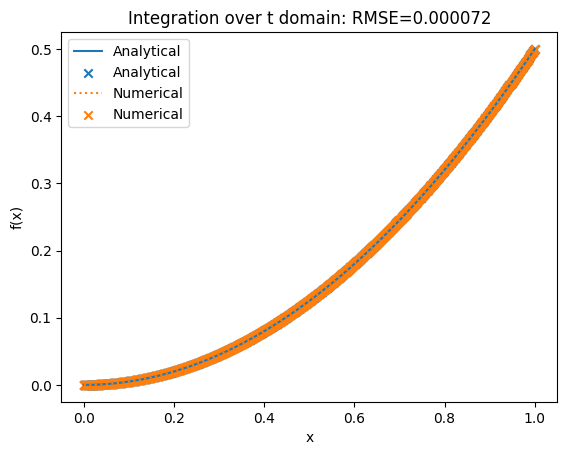

In [73]:
#plot graph of x_vals - x_numerical vs f_analytical(x_vals)
plt.plot(x_vals,f_analytical(x_vals),label='Analytical')
plt.scatter(x_vals,f_analytical(x_vals),label='Analytical',marker='x')
plt.plot(x_vals,x_numerical,ls=":",label='Numerical')
plt.scatter(x_vals,x_numerical,label='Numerical',marker='x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Integration over t domain: {RMSE=:0.6f}')
plt.legend()
plt.show()

The code below solves 

$$\int v \, dx = \int v \left( \frac{d}{dx} \left( \frac{dt}{dx} \cdot \frac{df}{dt} \right) \right) dx \\
\int v \, \frac{dx}{dt} dt = - \int  \frac{d}{dx} \left( v \right)  \cdot \left( \frac{dt}{dx} \cdot \frac{df}{dt} \right)  dx \\
\int v \, \frac{1}{\alpha' (x)} dt = - \int  v'(t)   \cdot \left( \alpha'(x) \cdot f'(t) \right)  dt \\
\int  \frac{v(t)}{\alpha' (\alpha^{-1}(t))} dt = -  \int  v'(t)   \cdot \alpha'(\alpha^{-1}(t)) \cdot f'(t) dt \\
\Sigma_t \Sigma_i   \frac{v(t_i)}{\alpha' (\alpha^{-1}(t_i))} \cdot d_t = - \Sigma_t \Sigma_i  v'(t_i)   \cdot \alpha'(\alpha^{-1}(t_i)) \cdot f'(t_i) \cdot d_t ,$$
 
the weak form of
$ 1 =  \frac{d^2}{dx^2} f $
, where $t=\alpha (x)$ thus $ \frac{dt}{dx}  =\alpha' (x)$.
Note that here, we took the integral over the x domain, not t domain.

This one is chosen for the final application.


In [77]:
N_divisions:int = 20

alpha=custom_function(lambda x: x**3, lambda x: 3*x**2, lambda x: 6*x, lambda x: x**(1/3))
alpha=custom_function(lambda x: x**2, lambda x: 2*x, lambda x: 2, lambda x: np.sqrt(x))
alpha=custom_function(lambda x: x, lambda x: 1, lambda x: 0, lambda x: x)
alpha=custom_function(lambda x: (np.exp(x) -1)/(np.exp(1)-1), lambda x: np.exp(x)/(np.exp(1)-1), lambda x: np.exp(x)/(np.exp(1)-1), lambda x: np.log(x*(np.exp(1)-1)+1))
alpha=custom_function(lambda x: np.sin(x)/np.sin(1.0), lambda x: np.cos(x)/np.sin(1.0), lambda x: -np.sin(x)/np.sin(1.0), lambda x: np.arcsin(x*np.sin(1.0)))
# alpha=custom_function(lambda x: x**6, lambda x: 6*x**5, lambda x: 30*x**4, lambda x: x**(1/6))  
# alpha=custom_function(lambda x: x**4, lambda x: 4*x**3, lambda x: 12*x**2, lambda x: x**(1/4))

d: float=1/N_divisions
# 3 gaussian points to iterate over [0,1] 
# gauss_points = np.array([0.11270167, 0.5, 0.88729833])
# gauss_weights = np.array([5/9, 8/9, 5/9])*0.5
gauss_points = 0.5*(np.array([-np.sqrt(5+2*np.sqrt(10/7))/3,-np.sqrt(5-2*np.sqrt(10/7))/3, 0, 
                              np.sqrt(5-2*np.sqrt(10/7))/3,np.sqrt(5+2*np.sqrt(10/7))/3])+1)
gauss_weights = np.array([(322-13*np.sqrt(70))/900, (322+13*np.sqrt(70))/900, 128/225, 
                          (322+13*np.sqrt(70))/900, (322-13*np.sqrt(70))/900])*0.5
N_gauss_points = gauss_points.size
phi_derivatives1 = 1/d
phi_derivatives2 = -1/d

K=np.zeros((N_divisions+1,N_divisions+1))
f=np.zeros(N_divisions+1)
K_temp = np.zeros((2,2))
for i in range(N_divisions):
    t1=i*d
    t2=(i+1)*d
    d_x=alpha.inverse(t2)-alpha.inverse(t1)
    for j in range(N_gauss_points):
        t=(i+gauss_points[j])*d
        x=alpha.inverse(t)
        phi1=gauss_points[j]
        phi2=1-gauss_points[j]
        a_p=alpha.prime(x)
        
        K_temp[0,0] = - phi_derivatives2*a_p*phi_derivatives2 
        K_temp[0,1] = - phi_derivatives1*a_p*phi_derivatives2 
        K_temp[1,0] = - phi_derivatives2*a_p*phi_derivatives1 
        K_temp[1,1] = - phi_derivatives1*a_p*phi_derivatives1 
        K_temp *= d #d_x
        K[i:i+2,i:i+2] += K_temp*gauss_weights[j]
        f[i:i+2] += np.array([phi2/a_p,phi1/a_p])*gauss_weights[j]*d

A=K[1:N_divisions,1:N_divisions]
b=f[1:N_divisions]
b-=K[1:N_divisions,0]*0.0
b-=K[1:N_divisions,N_divisions]*0.5
A[0:5,0:5],b[0:5]

(array([[-47.47964643,  23.71875844,   0.        ,   0.        ,
           0.        ],
        [ 23.71875844, -47.35303233,  23.6342739 ,   0.        ,
           0.        ],
        [  0.        ,  23.6342739 , -47.14125131,  23.50697742,
           0.        ],
        [  0.        ,   0.        ,  23.50697742, -46.84314539,
          23.33616798],
        [  0.        ,   0.        ,   0.        ,  23.33616798,
         -46.45704855]]),
 array([0.0421171 , 0.04222971, 0.04241943, 0.04268939, 0.04304418]))

In [78]:
x=np.linalg.solve(A,b)
x_numerical=np.array([0]+x.tolist()+[0.5])
t_vals=np.linspace(0,1,N_divisions+1)
x_vals=alpha.inverse(t_vals)
f_analytical=lambda x: 0.5*x**2

SE=0.0
# 3 gaussian points to iterate over [0,1]
#x_numerical=np.zeros(N_divisions+1) # Integration validation (Done. SE=0)
for i in range(N_divisions):
    t1=i*d
    t2=(i+1)*d
    d_x=alpha.inverse(t2)-alpha.inverse(t1)
    for j in range(N_gauss_points):
        t=(i+gauss_points[j])*d
        x=alpha.inverse(t)
        phi1=gauss_points[j]
        phi2=1-gauss_points[j]
        SE+=gauss_weights[j]*((x_numerical[i]*phi2+x_numerical[i+1]*phi1)-f_analytical(x))**2/alpha.prime(x)*d

RMSE=np.sqrt(SE/1.0)
print(f"{x_vals[0:5]=}\n  {x_vals[-6:-1]=}\n{x_numerical[0:5]=}\n  {x_numerical[-6:-1]=}")
print(f"{f_analytical(x_vals[0:5])=}\n  {f_analytical(x_vals[-6:-1])=}\n{RMSE=:0.6f}")
print(f"When numerical=0.0, RMSE={np.sqrt(1/20):0.6f} ")

x_vals[0:5]=array([0.        , 0.04208597, 0.08424672, 0.12655822, 0.16909893])
  x_vals[-6:-1]=array([0.68297464, 0.7384964 , 0.79698224, 0.85920538, 0.92629162])
x_numerical[0:5]=array([0.        , 0.00089948, 0.00357625, 0.00804939, 0.01435129])
  x_numerical[-6:-1]=array([0.23339136, 0.27285132, 0.31774464, 0.36925034, 0.42909794])
f_analytical(x_vals[0:5])=array([0.        , 0.00088561, 0.00354875, 0.00800849, 0.01429722])
  f_analytical(x_vals[-6:-1])=array([0.23322718, 0.27268847, 0.31759035, 0.36911695, 0.42900808])
RMSE=0.000584
When numerical=0.0, RMSE=0.223607 


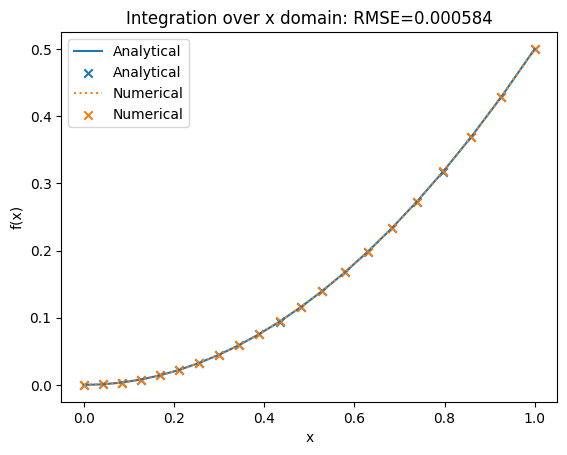

In [79]:
#plot graph of x_vals - x_numerical vs f_analytical(x_vals)
plt.plot(x_vals,f_analytical(x_vals),label='Analytical')
plt.scatter(x_vals,f_analytical(x_vals),label='Analytical',marker='x')
plt.plot(x_vals,x_numerical,ls=":",label='Numerical')
plt.scatter(x_vals,x_numerical,label='Numerical',marker='x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Integration over x domain: {RMSE=:0.6f}')
plt.legend()
plt.show()